In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



In [3]:
# Load dataset (Replace with actual semiconductor dataset)
df = pd.read_csv("synthetic_semiconductor_data.csv")



In [4]:
# Data Preprocessing
df.dropna(inplace=True)  # Handle missing values



In [5]:
# Feature Selection (Example features)
features = ["voltage", "temperature", "power", "frequency", "signal_integrity"]
target = "failure_status"  # 1 for failure, 0 for no failure



In [6]:
X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [7]:
# Train Machine Learning Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [8]:
# Predictions
y_pred = model.predict(X_test)



In [9]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       456
           1       1.00      1.00      1.00       544

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



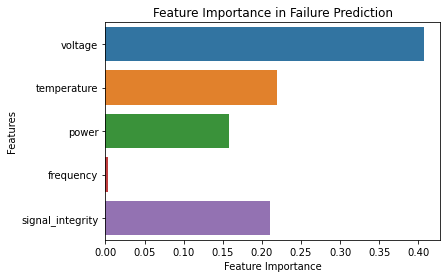

In [10]:
# Feature Importance
sns.barplot(x=model.feature_importances_, y=features)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Failure Prediction")
plt.show()



In [11]:
# Deployment Example (Basic Flask API)
from flask import Flask, request, jsonify
app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    input_data = np.array([data[feature] for feature in features]).reshape(1, -1)
    prediction = model.predict(input_data)[0]
    return jsonify({"failure_prediction": int(prediction)})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with watchdog (windowsapi)


SystemExit: 1

D:\Users\LENOVO\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3452: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
